# Homework 6
### Wing Huang PID: A18894844
**Date:** 2026-02-17

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

## Problem 1: Integration


In [3]:
# (a)
f1 = lambda x: (1 + x**2) / x
print(quad(f1, 1, 20))


(202.495732273554, 1.3443696573563126e-08)


In [4]:
# (b)
f2 = lambda x: np.sin(x) * np.exp(-x) / x
print(quad(f2, 1, np.inf))


(0.1793245350394128, 7.620675259525255e-09)


In [6]:
# (c)
f3 = lambda x: np.sin(x)/x
print(quad(f3, 0, 1, points=[0]))


(0.946083070367183, 1.0503632079297087e-14)


In [20]:
# (d)
def mid(f, a, b):
    return (b - a) * f((a+b) / 2)

def rec(f, a, b, tol, d, md):
     m = mid(f, a, b)
     mm = (a + b) / 2
     if abs(mid(f, a, mm) + mid(f, mm, b) - mm) < tol or d >= md:
         return mid(f, a, mm) + mid(f, mm, b)
     return rec(f, a, mm, tol/2, d+1, md) + rec(f, mm, b, tol/2, d+1, md)

def adaptive_integration(f, a, b, tol, md):
     return rec(f, a, b, tol, 0, md)

f = lambda x: (1 + x**2)/x
print(adaptive_integration(f, 1, 20, 1e-8, 20))


202.49573227355057


## Problem 2


In [21]:
# Generate your unique numbers s and a from your PID (A18894844 -> 18894844)
student_number = 18894844
np.random.seed(student_number)
s = np.random.uniform(1, 10)
np.random.seed(student_number)
a = np.random.randn()
print(s, a)


7.6548296906390165 0.8122727023788983


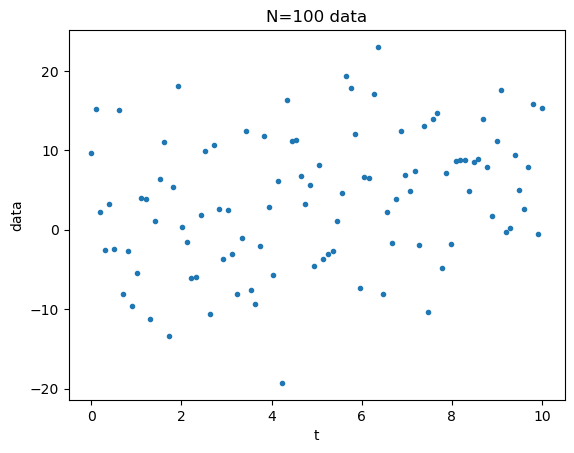

In [22]:
def make_data(N):
    t = np.linspace(0, 10, N)
    signal = a * t
    noise = np.random.randn(N) * s
    data = signal + noise
    return t, data

# (a)
N = 100
t, data = make_data(N)
plt.plot(t, data, '.')
plt.xlabel("t")
plt.ylabel("data")
plt.title("N=100 data")
plt.show()


In [23]:
# (b)
def best_fit_slope(t, data):
    return np.dot(t, data) / np.dot(t, t)

a_hat = best_fit_slope(t, data)
print(a_hat)


0.7781379936726632


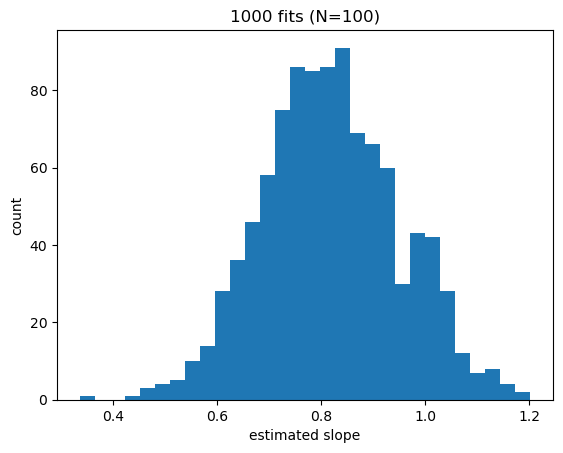

In [24]:
# (c)
slopes = []
for _ in range(1000):
    t, data = make_data(100)
    slopes.append(best_fit_slope(t, data))

plt.hist(slopes, bins=30)
plt.xlabel("estimated slope")
plt.ylabel("count")
plt.title("1000 fits (N=100)")
plt.show()